In [ ]:
!pip install nltk
!pip install spacy
!python -m spacy download es_core_news_sm
!pip install -U imbalanced-learn
!pip install pyspellchecker


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Oculta warnings
import warnings
warnings.simplefilter('ignore')

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# CARGAR DATOS
**DATOS DE ENTRENAMIENTO**

la columna de trastornos indica si el TWEET es de una persona con depresión o es de control.


**control**:     0

**depresión**:   1

In [ ]:
ruta_archivo_entrenamiento = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba/train.csv'
data_train = pd.read_csv(ruta_archivo_entrenamiento, sep=',')
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263950 entries, 0 to 263949
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   USER_ID     263950 non-null  object 
 1   TWEET_ID    263920 non-null  float64
 2   TWEET_TEXT  263841 non-null  object 
 3   trastorno   263950 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.1+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,87,2.147484e+09,RT @Julii_AKD: por qué a la mayoría de las pib...,1
1,6,2.147484e+09,Empezar un 2017 sintiéndote solo.,1
2,279,2.147484e+09,Ah mirá que lindo como me escrachan en Instagr...,0
3,518,2.147484e+09,https://t.co/hC3rULMb1P,0
4,301,2.147484e+09,"Tu sigue con él, cumple tu deber, muy pronto v...",0
5,177,2.147484e+09,@Sebbasrp deje dormir al prójimo.,0
6,45,2.147484e+09,"RT @Crookedgirlx: no quiero vivir más, estoy c...",1
7,29,2.147484e+09,RT @Esunbreakable: Me da un poquito de vergüen...,1
8,388,2.147484e+09,Venezuela-related Designation https://t.co/IOZ...,0
9,31,2.147484e+09,Tengo muchas ganas de escribirte para decirte ...,1


#DATOS DE PRUEBA

In [ ]:
#num_docs = 50000

In [ ]:
ruta_archivo_prueba = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba (control vs depresión)/train.csv'
data_train = pd.read_csv(ruta_archivo_prueba, sep=',')
#data = pd.read_csv(ruta_archivo_entrenamiento, sep=',')
#data_train = data.iloc[:num_docs, :]
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263950 entries, 0 to 263949
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   USER_ID     263950 non-null  object 
 1   TWEET_ID    263920 non-null  float64
 2   TWEET_TEXT  263841 non-null  object 
 3   trastorno   263950 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.1+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,87,2.147484e+09,RT @Julii_AKD: por qué a la mayoría de las pib...,1
1,6,2.147484e+09,Empezar un 2017 sintiéndote solo.,1
2,279,2.147484e+09,Ah mirá que lindo como me escrachan en Instagr...,0
3,518,2.147484e+09,https://t.co/hC3rULMb1P,0
4,301,2.147484e+09,"Tu sigue con él, cumple tu deber, muy pronto v...",0
5,177,2.147484e+09,@Sebbasrp deje dormir al prójimo.,0
6,45,2.147484e+09,"RT @Crookedgirlx: no quiero vivir más, estoy c...",1
7,29,2.147484e+09,RT @Esunbreakable: Me da un poquito de vergüen...,1
8,388,2.147484e+09,Venezuela-related Designation https://t.co/IOZ...,0
9,31,2.147484e+09,Tengo muchas ganas de escribirte para decirte ...,1


# DATOS DE PRUEBA (TEST)

In [ ]:
num_docs_test = 50000

In [ ]:
ruta_archivo_test = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba (control vs depresión)/test.csv'
# data_test = pd.read_csv(ruta_archivo_prueba, lineterminator='\n')
data_test = pd.read_csv(ruta_archivo_test, lineterminator='\n')
#data_test =data_t.iloc[:num_docs_test, :]
data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113075 entries, 0 to 113074
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   USER_ID     113075 non-null  int64 
 1   TWEET_ID    113075 non-null  int64 
 2   TWEET_TEXT  113075 non-null  object
 3   trastorno   113075 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.5+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,30,2147483647,RT @Unicornio_Azul5: ¿Está mal desear estar mu...,1
1,508,2147483647,RT @tachame_ladoble: Esta noche!! Volvemos a V...,0
2,279,2147483647,RT @PsychdelicPics: Art by I Love Doodle https...,0
3,12,2147483647,Hoy no he pasado de las 700kcal.,1
4,277,2147483647,RT @NetSportAcademy: Elisa Luque se proclama c...,0


#Preprocesamiento de los datos

In [ ]:
import nltk
nltk.download('stopwords')  #Solamente se ha de descargar la primera vez.
stopwords_es = nltk.corpus.stopwords.words('spanish')   # Extrae las stopwords en español

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


*Eliminar etiquetas HTML*

In [ ]:
import re

def removeHTML(text):
    if isinstance(text, str):  # Verificar si es de tipo string
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, '', text)
        return cleantext
    else:
        return text  # Devolver el valor original si no es de tipo string

*Limpieza del texto*

In [ ]:
import re
import string

def clean(text):
    if isinstance(text, str):  # Verificar si es de tipo string
        # Eliminar hashtags
        text = re.sub(r'#\w+', '', text)

        # Eliminar URLs o enlaces
        text = re.sub(r'(https?://)?[a-zA-Z0-9]+\.[a-zA-Z0-9]+\S*', '', text)

        # Eliminar nombres de usuarios de Twitter
        text = re.sub(r'@\w+', '', text)

        # Eliminar Nombres propios
        text = re.sub(r'\b[A-Z][a-z]+\b', '', text)

        # Eliminar todos los caracteres especiales
        text = re.sub(r'[^\w\s]+', '', text)

        # Eliminar prefijos y números
        text = re.sub(r'\b\w{1,2}\b|\d+', '', text)

        # Eliminar palabras específicas
        specific_words = ['retweet', 'retweets', 'hashtag', 'trending', 'mención', 'enlace', 'emoji', 'timeline', 'interacciones',
                          'tuit', 'seguidores', 'notificaciones', 'seguir', 'favorito', 'perfil', 'tendencia', 'influencer',
                          'compartir', 'actualización', 'explorar', 'seguir', 'comunidad', 'contenido', 'popular',
                          'recomendar', 'experiencia', 'conectar', 'comentar', 'compartir', 'comunidad', 'actualización',
                          'drk', 'followers', 'stats', 'for', 'new', 'little', 'unfollower', 'unfollowers', 'today', 'shit','twitter','nombre',
                          'eric','story','great', 'short','squeeze','piggly','wiggly','hmv','even','follas','you','i','he','she',
                          'it','we','they','the','and','that','these','those','tweet','followed','follower']
        text = ' '.join([word for word in text.split() if word not in specific_words])

        # Eliminar emojis
        emojis = re.findall(r'[^\w\s,]', text)
        cleaned_emojis = [emoji for emoji in emojis if emoji not in ['@', '#', '/', '?','¿','.','…','"',':','“','!','¡','°','-',"‘",'’',
                                                                     '=',';','(',')',"'","'",'&','€','%','$','*','+','|', '”','🇦','🇷',',',
                                                                     ', ','—','«',' »','»','« ','[, ]','[,]',',',', ','',' ',' ♀',' 🏽']]
        for emoji in cleaned_emojis:
            text = text.replace(emoji, '')

        # Convertir el texto a minúsculas
        text = text.lower()

        # Eliminar signos de puntuación
        text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
        # Tokenizar el texto en palabras
        words = text.split()

        # Reconstruir el texto limpio
        text = ' '.join(words)

        # Devuelve el texto limpio
        return text
    else:
        return text  # Devolver el valor original si no es de tipo string

*corrección de palabras o tokens*

In [ ]:
# from spellchecker import SpellChecker

# def corrector_ortografico(tokens):
#     spell = SpellChecker(language='es')
#     tokens_corregidos = [spell.correction(token) if spell.correction(token) is not None else token for token in tokens]
#     return tokens_corregidos

# def corregir_palabras_largas(tokens):
#     tokens_corregidos = []
#     for token in tokens:
#         # Corregir repeticiones de letras
#         token_corregido = re.sub(r'(.)\1+', r'\1\1', token)

#         # Corregir alargamiento de palabras
#         token_corregido = re.sub(r'(\w)\1{2,}', r'\1\1', token_corregido)

#         # Eliminar vocales repetidas más de 2 veces seguidas
#         token_corregido = re.sub(r'([aeiouáéíóú]{2,})\1+', r'\1', token_corregido, flags=re.IGNORECASE)

#         tokens_corregidos.append(token_corregido)
#     return tokens_corregidos

*lematizar y extraer términos*

In [ ]:
import pandas as pd
import spacy
from spacy.lang.es import Spanish
from nltk.corpus import stopwords


# Cargar modelo de spaCy
nlp = spacy.load("es_core_news_sm")

# Cargar stopwords en español
stopwords_es = set(stopwords.words('spanish'))

def extractTerms(text):
    if isinstance(text, str):
        # Tokenización y lematización con spaCy
        doc = nlp(text)
        lemmatized_terms = [token.lemma_ for token in doc if token.text.lower() not in stopwords_es]

        return lemmatized_terms
    else:
        return []  # Devolver una lista vacía si el texto no es una cadena de texto

# Ejemplo de uso
texto_ejemplo = "Los gatos están saltando sobre las vallas"
terminos_extraidos = extractTerms(texto_ejemplo)
print(terminos_extraidos)

['gato', 'saltar', 'valla']


# Preprocesamieto del conjunto de datos de entrenamiento

In [ ]:
def Tokenizer(text):
    if isinstance(text, str):
        return text.split()
    else:
        return []  # Si el valor no es una cadena, retornar una lista vacía


In [ ]:
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(removeHTML)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(clean)

#data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(extractTerms)
#data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x) # Combinar los elementos de la lista en una sola cadena separados por espacios
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263950 entries, 0 to 263949
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   USER_ID     263950 non-null  object 
 1   TWEET_ID    263920 non-null  float64
 2   TWEET_TEXT  263841 non-null  object 
 3   trastorno   263950 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.1+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,87,2.147484e+09,por qué mayoría las pibas les gusta tener pier...,1
1,6,2.147484e+09,sintiéndote solo,1
2,279,2.147484e+09,mirá que lindo como escrachan magnifico,0
3,518,2.147484e+09,,0
4,301,2.147484e+09,sigue con cumple deber muy pronto vestida novi...,0
5,177,2.147484e+09,deje dormir prójimo,0
6,45,2.147484e+09,quiero vivir más estoy cansada todo,1
7,29,2.147484e+09,poquito vergüenza cuando alguien quiere alzarm...,1
8,388,2.147484e+09,related,0
9,31,2.147484e+09,muchas ganas escribirte para decirte que extra...,1


In [ ]:
# Verificar si hay valores NaN o nulos en la columna 'TWEET_TEXT'
conteo_nulos = data_train['TWEET_TEXT'].isnull().sum()

if conteo_nulos > 0:
    # Filtrar los valores NaN o nulos antes de aplicar len()
    datos_no_nulos = data_train[~data_train['TWEET_TEXT'].isnull()]
    conteo_vacios = (datos_no_nulos['TWEET_TEXT'].apply(len) == 0).sum()
else:
    # Si no hay valores NaN o nulos, puedes aplicar len() directamente
    conteo_vacios = (data_train['TWEET_TEXT'].apply(len) == 0).sum()

# Imprimir el número de elementos vacíos
print("Número de elementos vacíos en la columna 'TWEET_TEXT':", conteo_vacios)


Número de elementos vacíos en la columna 'TWEET_TEXT': 16641


In [ ]:
# Filtrar filas donde 'TWEET_TEXT' no sea una lista vacía
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].fillna('')

# Filtrar filas donde 'TWEET_TEXT' no sea una cadena vacía
data_train = data_train[data_train['TWEET_TEXT'].apply(lambda x: len(str(x)) > 0)]

# Reiniciar el índice del DataFrame después de eliminar filas
data_train.reset_index(drop=True, inplace=True)

In [ ]:
# Verificar si hay valores NaN o nulos en la columna 'TWEET_TEXT'
conteo_nulos = data_train['TWEET_TEXT'].isnull().sum()

if conteo_nulos > 0:
    # Filtrar los valores NaN o nulos antes de aplicar len()
    datos_no_nulos = data_train[~data_train['TWEET_TEXT'].isnull()]
    conteo_vacios = (datos_no_nulos['TWEET_TEXT'].apply(len) == 0).sum()
else:
    # Si no hay valores NaN o nulos, puedes aplicar len() directamente
    conteo_vacios = (data_train['TWEET_TEXT'].apply(len) == 0).sum()

# Imprimir el número de elementos vacíos
print("Número de elementos vacíos en la columna 'TWEET_TEXT':", conteo_vacios)

Número de elementos vacíos en la columna 'TWEET_TEXT': 0


In [ ]:
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(Tokenizer)
data_train.head(10)

,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,87,2.147484e+09,"[por, qué, mayoría, las, pibas, les, gusta, te...",1
1,6,2.147484e+09,"[sintiéndote, solo]",1
2,279,2.147484e+09,"[mirá, que, lindo, como, escrachan, magnifico]",0
3,301,2.147484e+09,"[sigue, con, cumple, deber, muy, pronto, vesti...",0
4,177,2.147484e+09,"[deje, dormir, prójimo]",0
5,45,2.147484e+09,"[quiero, vivir, más, estoy, cansada, todo]",1
6,29,2.147484e+09,"[poquito, vergüenza, cuando, alguien, quiere, ...",1
7,388,2.147484e+09,[related],0
8,31,2.147484e+09,"[muchas, ganas, escribirte, para, decirte, que...",1
9,2,2.147484e+09,"[deseando, mudarme]",1


In [ ]:
#from spellchecker import SpellChecker

# def corrector_ortografico(tokens):
#     spell = SpellChecker(language='es')
#     tokens_corregidos = [spell.correction(token) if spell.correction(token) is not None else token for token in tokens]
#     return tokens_corregidos

# def corregir_palabras_largas(tokens):
#     tokens_corregidos = []
#     for token in tokens:
#         # Corregir repeticiones de letras
#         token_corregido = re.sub(r'(.)\1+', r'\1\1', token)

#         # Corregir alargamiento de palabras
#         token_corregido = re.sub(r'(\w)\1{2,}', r'\1\1', token_corregido)

#         # Eliminar vocales repetidas más de 2 veces seguidas
#         token_corregido = re.sub(r'([aeiouáéíóú]{2,})\1+', r'\1', token_corregido, flags=re.IGNORECASE)

#         tokens_corregidos.append(token_corregido)
#     return tokens_corregidos

In [ ]:
# data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(corregir_palabras_largas)
# data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(corrector_ortografico)
# data_train.info()
# data_train.head(10)

In [ ]:
# # Especifica la ubicación y el nombre del archivo CSV donde deseas guardar los datos procesados
# csv_path = '/content/drive/MyDrive/Experimentación Python Tesis /Tweets preprocesados.csv'

# # Guarda el DataFrame en un nuevo archivo CSV
# data_train.to_csv(csv_path, index=False)

# print(f"Los datos procesados se han guardado en '{csv_path}'")

#Vectorización de los datos


In [ ]:
import gensim
from gensim.models import Word2Vec
# Entrena un modelo Word2Vec usando CBOW
modelW = Word2Vec(data_train['TWEET_TEXT'], vector_size=300, window=5, min_count=1, sg=0)

# Obtener la representación vectorial de un documento promediando las palabras
def document_vector(tokens, modelW):
    # Filtrar palabras que no están en el modelo
    tokens = [token for token in tokens if token in modelW.wv.key_to_index]
    if len(tokens) == 0:
        return np.zeros(modelW.vector_size)
    return np.mean([modelW.wv[token] for token in tokens], axis=0)

# Crear una matriz de características X utilizando las representaciones vectoriales de Word2Vec
X  = np.array([document_vector(tokens, modelW) for tokens in data_train['TWEET_TEXT']])

# Asegurémonos de que los valores en X_word2vec sean no negativos
X[X  < 0] = 0

# Discretizar los valores en X_word2vec en palabras
X = [[str(i) for i in vector] for vector in X]


# Obtener las etiquetas y
y = data_train['trastorno'].values

In [ ]:
# Imprimimos el la longitud de las palabras totales
print(modelW)
print(len(modelW.wv))
# Observamos el vocabulario creado
words = modelW.wv.index_to_key
print(words)

In [ ]:
# Obtener la representación vectorial de una palabra específica
vector = modelW.wv['depresión']
vector

array([ 0.16451387,  0.14679186,  0.2860191 , -0.31901586, -0.32489917,
       -0.14696081, -0.25936288,  0.29739904,  0.1616955 , -0.5468308 ,
        0.29258877, -0.29522243, -0.20698048,  0.54544854,  0.2027898 ,
       -0.51848185,  0.7752849 ,  0.0181764 , -0.19622195, -0.9899106 ,
       -0.5153974 , -0.05174198,  0.06726764,  0.5546665 ,  0.25760385,
        0.1503931 , -0.31533432,  0.39431676, -0.4005302 , -0.0800839 ,
       -0.26693028, -0.08802502, -0.07112601,  0.1471807 , -0.38566965,
        0.8838193 ,  0.29064813, -0.24676949,  0.00294421, -0.0098119 ,
       -0.56592196, -0.07724254, -0.6438885 , -0.12629771,  0.0800034 ,
       -0.09807048,  0.18040875,  0.03290558, -0.24943428,  0.24793087,
       -0.09894316,  0.4951452 , -0.21997893, -0.27638078,  0.17221925,
        0.0399429 , -0.12490337,  0.44147003, -0.15150031, -0.2837387 ,
        0.1258218 , -0.35076854, -0.1059159 ,  0.47162497,  0.30944467,
        0.47404623,  0.02092221,  0.30963045,  0.15467112,  0.16

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation as LDA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Aplicar LDA para reducir la dimensionalidad
n_topics = 10  # Define el número de tópicos (componentes)
lda = LDA(n_components=n_topics)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


In [ ]:
# Crear un modelo de red neuronal secuencial

# Cargar el modelo entrenado
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Experimentación Python Tesis /Experimento Dataset Depresión/LDA/Experimentos pt2/modelo_entrenado_LDA word2vec(70-30).h5')


model = Sequential()

input_dim = X_train_lda.shape[1]  # Obtener la dimensión de entrada
model.add(Dense(350, activation='relu', input_dim=input_dim))
model.add(Dropout(0.1))  # Dropout para regularización

# Agregar una capa oculta
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.1))  # Dropout para regularización

# Agregar una capa de salida con una neurona y función de activación sigmoide para clasificación binaria
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Utilizar EarlyStopping para detener el entrenamiento si no hay mejora
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo en los datos de entrenamiento transformados por LDA
model.fit(X_train_lda, y_train, epochs=1000, batch_size=200, verbose=1, validation_data=(X_test_lda, y_test), callbacks=[early_stopping])

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test_lda)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convertir probabilidades en etiquetas binarias (0 o 1)

# Calcular la precisión, recall y puntuación F1
accuracy = accuracy_score(y_test, y_pred_binary )
precision = precision_score(y_test, y_pred_binary, average='weighted')
recall = recall_score(y_test, y_pred_binary, average='weighted')
f1 = f1_score(y_test, y_pred_binary, average='weighted')

# Guardar el modelo entrenado
model.save('/content/drive/MyDrive/Experimentación Python Tesis /Experimento Dataset Depresión/LDA/Experimentos pt2/modelo_entrenado_LDA word2vec(70-30).h5')


Epoch 1/1000
866/866 [==============================] - 6s 5ms/step - loss: 0.5936 - accuracy: 0.6792 - val_loss: 0.5863 - val_accuracy: 0.6836
Epoch 2/1000
866/866 [==============================] - 4s 5ms/step - loss: 0.5884 - accuracy: 0.6831 - val_loss: 0.5859 - val_accuracy: 0.6827
Epoch 3/1000
866/866 [==============================] - 4s 5ms/step - loss: 0.5876 - accuracy: 0.6840 - val_loss: 0.5848 - val_accuracy: 0.6853
Epoch 4/1000
866/866 [==============================] - 4s 5ms/step - loss: 0.5872 - accuracy: 0.6841 - val_loss: 0.5841 - val_accuracy: 0.6848
Epoch 5/1000
866/866 [==============================] - 4s 5ms/step - loss: 0.5866 - accuracy: 0.6838 - val_loss: 0.5839 - val_accuracy: 0.6849
Epoch 6/1000
866/866 [==============================] - 4s 5ms/step - loss: 0.5862 - accuracy: 0.6841 - val_loss: 0.5853 - val_accuracy: 0.6843
Epoch 7/1000
866/866 [==============================] - 4s 5ms/step - loss: 0.5860 - accuracy: 0.6847 - val_loss: 0.5832 - val_accuracy:

In [ ]:
print(f"Exactitud: {accuracy * 100:.2f}%")
print(f"Precisión: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"Puntuación F1: {f1 * 100:.2f}%")

Exactitud: 70.44%
Precisión: 70.68%
Recall: 70.44%
Puntuación F1: 70.39%


In [ ]:
print(f"Exactitud: {accuracy * 100:.2f}%")
print(f"Precisión: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"Puntuación F1: {f1 * 100:.2f}%")

Exactitud: 71.15%
Precisión: 71.16%
Recall: 71.15%
Puntuación F1: 71.16%


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_lda)

# Obtiene la matriz de confusión. Las filas corresponden a las clases reales,
umbral = 0.5  # Puedes ajustar este umbral según tus necesidades
y_pred_binario = (y_pred > umbral).astype(int)

# Calcular la matriz de confusión con las etiquetas binarias
cm = confusion_matrix(y_test, y_pred_binario)
prop_real = np.sum(y_test)/len(y_test)
prop_etiqutados = (cm[0,1]+cm[1,1])/len(y_test)

print("Matriz de confusión: \n\n", cm, "\n")
print('Proporción de comentarios positivos: %.2f'% prop_real)
print('Proporción de comentarios positivos etiquetados: %.2f'% prop_etiqutados)

2306/2306 [==============================] - 3s 1ms/step
Matriz de confusión: 

 [[26647 10702]
 [10582 25856]] 

Proporción de comentarios positivos: 0.49
Proporción de comentarios positivos etiquetados: 0.50


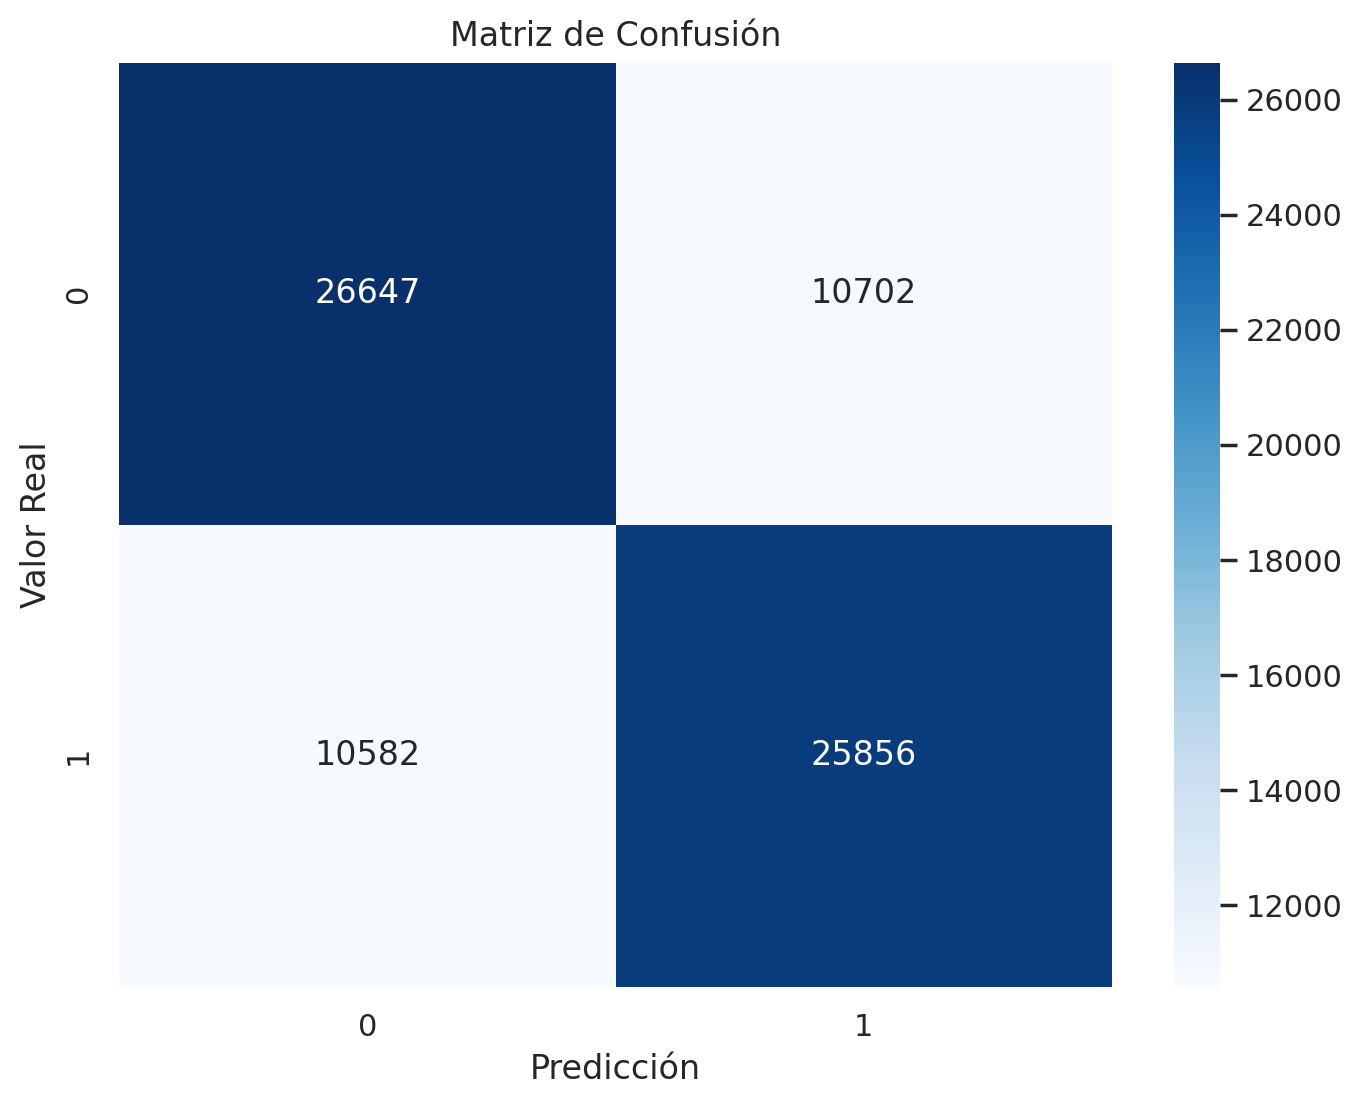

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura para la matriz de confusión
plt.figure(figsize=(8, 6))

# Crear una matriz de confusión usando el heatmap de Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])

# Etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar la gráfica
plt.show()

# Aprensizaje del modelo: Red neuronal
**Validación Cruzada K=10**

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import LatentDirichletAllocation as LDA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Inicializar listas para almacenar métricas
train_accuracy_scores = []
train_precision_scores = []
train_recall_scores = []
train_f1_scores = []

val_accuracy_scores = []
val_precision_scores = []
val_recall_scores = []
val_f1_scores = []

# Crear un objeto StratifiedKFold para dividir los datos en k-folds estratificados
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Dividir los datos en k-folds y realizar la validación cruzada
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # # Aplicar LDA para reducir la dimensionalidad
    # n_topics = 2  # Define el número de tópicos (componentes)
    # lda = LDA(n_components=n_topics)
    # X_train_lda = lda.fit_transform(X_train, y_train)
    # X_val_lda = lda.transform(X_val)

    # Crear un modelo de red neuronal secuencial
    model = Sequential()

    input_dim = X_train_lda.shape[1]  # Obtener la dimensión de entrada
    model.add(Dense(350, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.1))  # Dropout para regularización

    # Agregar una capa oculta
    model.add(Dense(250, activation='relu'))
    model.add(Dropout(0.1))  # Dropout para regularización

    # Agregar una capa de salida con una neurona y función de activación sigmoide para clasificación binaria
    model.add(Dense(1, activation='sigmoid'))

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Utilizar EarlyStopping para detener el entrenamiento si no hay mejora
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Entrenar el modelo en los datos de entrenamiento transformados por LDA
    model.fit(X_train_lda, y_train, epochs=1000, batch_size=200, verbose=1, validation_data=(X_val_lda, y_val), callbacks=[early_stopping])

    # Predicciones en el conjunto de entrenamiento y validación
    y_train_pred = (model.predict(X_train_lda) > 0.5).astype(int)
    y_val_pred = (model.predict(X_val_lda) > 0.5).astype(int)

    # Calcular métricas de entrenamiento
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Calcular métricas de validación
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Almacenar las métricas en las listas
    train_accuracy_scores.append(train_accuracy)
    train_precision_scores.append(train_precision)
    train_recall_scores.append(train_recall)
    train_f1_scores.append(train_f1)

    val_accuracy_scores.append(val_accuracy)
    val_precision_scores.append(val_precision)
    val_recall_scores.append(val_recall)
    val_f1_scores.append(val_f1)

# Calcular las métricas promediadas en entrenamiento
train_accuracy_mean = np.mean(train_accuracy_scores)
train_precision_mean = np.mean(train_precision_scores)
train_recall_mean = np.mean(train_recall_scores)
train_f1_mean = np.mean(train_f1_scores)

# Calcular las métricas promediadas en validación
val_accuracy_mean = np.mean(val_accuracy_scores)
val_precision_mean = np.mean(val_precision_scores)
val_recall_mean = np.mean(val_recall_scores)
val_f1_mean = np.mean(val_f1_scores)





In [ ]:
# Imprimir las métricas promediadas
print("Métricas de entrenamiento promediadas:")
print(f"Exactitud: {train_accuracy_mean * 100:.2f}%")
print(f"Precisión: {train_precision_mean * 100:.2f}%")
print(f"Recuperación: {train_recall_mean * 100:.2f}%")
print(f"Puntuación F1: {train_f1_mean * 100:.2f}%")

print("\nMétricas de validación promediadas:")
print(f"Exactitud: {val_accuracy_mean * 100:.2f}%")
print(f"Precisión: {val_precision_mean * 100:.2f}%")
print(f"Recuperación: {val_recall_mean * 100:.2f}%")
print(f"Puntuación F1: {val_f1_mean * 100:.2f}%")